## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import sklearn.metrics as sk
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
def generateData(dataSize):
    x=[i for i in range (dataSize+1)]
    y=[0]*(dataSize+1)
    a=-1
    b=2
    for j in range(len(x)):
        y[j]=a*x[j]+b
    return x,y

In [3]:
lenx=20
x,y=generateData(lenx)
print("x values is :",x)
print("y values is :",y)

x values is : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
y values is : [2, 1, 0, -1, -2, -3, -4, -5, -6, -7, -8, -9, -10, -11, -12, -13, -14, -15, -16, -17, -18]


#### Plot your data points. 

Text(0.5, 1.0, 'Data Points')

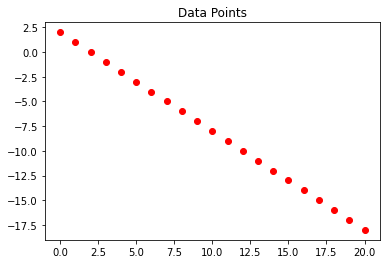

In [4]:
 #plotting the results
plt.scatter(x,y, color='red')
plt.gca().set_title("Data Points")

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [5]:
class GradientDescent:
    def __init__(self,x,y,alpha,batchSize=len(x),maxIter=5000,Gama=0.9):
        self.x=np.array(x)
        self.y=np.array(y)
        self.alpha=alpha
        self.Gama=Gama
        self.maxIter=maxIter
        self.batchSize=batchSize
        self.theta0=random.randrange(1,5)
        self.theta1=random.randrange(1,5)
        self.convCheck0,convCheck1=1,1
        self.theta0Draw=[]
        self.theta1Draw=[]
        self.losDraw=[]
        self.iterCounter=0
        self.y_predictd=[]

#if mini-batch is selected this method is used to create bateches of the total data set 
    def createBatches(self):
        batchesx=list()
        batchesy=list()
        number_of_miniBatchs=len(self.x)//self.batchSize
        batchesx=np.array_split(self.x,number_of_miniBatchs)
        batchesy=np.array_split(self.y,number_of_miniBatchs)
        return batchesx,batchesy
    
    def stopCriteria(self):
        if (self.iterCounter== self.maxIter):
            print("stopped by maxiteration reached")
            return True
        elif self.convCheck0<0.0001 and self.convCheck1<0.0001:
            print("stopped by convergence test the model stops convergence")
            return True
        else:
            return False
    def caclnorm(self,c,h):
        sq=np.square(c)+np.square(h)
        return np.sqrt(sq)
    
    def caclR2Score(self,t,u):
        score=sk.r2_score(t,u)
        print("the R2Score is : ",score)
        
    def plotout(self,a,s,xlbl,ylbl,mx):
        plt.plot(a[:mx],s[:mx])
        plt.xlabel(xlbl)
        plt.ylabel(ylbl)
        
    def plotRegression(selfa,X,y_actual,y_predictd):
        plt.scatter(X,y_actual, color='black')
        if type(y_predictd)==list:
            for i in range(0,len(y_predictd)):
                plt.plot(X,y_predictd[i])
        else:
            plt.plot(X,y_predictd)

        plt.gca().set_title("Gradient Descent Linear regression")
        
    def generalizedGradientDescent(self):
        gradient_theta0=1
        gradient_theta1=1
        cost=1000
        batchesx,batchesy=self.createBatches()
        while self.caclnorm(gradient_theta0,gradient_theta1)>=0.000001:
            temp_arr=[]
            if (self.stopCriteria()):
                break
            for i in range(len(batchesx)):
                x=batchesx[i]
                y_actual=batchesy[i]
                y_pred=self.theta0+x.dot(self.theta1)
                loss = np.square(y_pred-y_actual)
                cost = np.sum(loss)/(len(x))
                self.losDraw.append(cost)
                gradient_theta0=(self.alpha/len(x))*np.sum((y_pred-y_actual))
                gradient_theta1=(self.alpha/len(x))*np.sum(np.dot((y_pred-y_actual),x))
                temp0=self.theta0
                temp1=self.theta1
                self.theta0Draw.append(temp0)
                self.theta1Draw.append(temp1)
                self.theta0=self.theta0-gradient_theta0
                self.theta1=self.theta1-gradient_theta1
                self.convCheck0=abs(temp0-self.theta0)
                self.convCheck1=abs(temp1-self.theta1)
                self.iterCounter+=1
                if (i>=1):
                    temp_arr.append(y_pred)
                else:
                    temp_arr.append(y_pred)
                    self.y_predictd.append(y_pred)
            if len(temp_arr)>1:
                arr=np.array(temp_arr)
                self.y_predictd.append(arr.flatten())
        return self.theta0,self.theta1,cost,self.y_predictd[-1],self.y_predictd,self.losDraw,self.iterCounter,self.theta0Draw,self.theta1Draw
    
  

In [6]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.001
#Create Generic Gradient descent object
GD=GradientDescent(x,y,alpha)
outputs=GD.generalizedGradientDescent()

stopped by convergence test the model stops convergence


In [7]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
All_y_predictd=outputs[4]
losDraw=outputs[5]
iterCounter=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

### The R2Score

In [8]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9989726382667632


# Plot the required curves (loss-epochs, loss-theta0, loss-theta1
# all fitted lines per epoch (single graph) , best fit line)

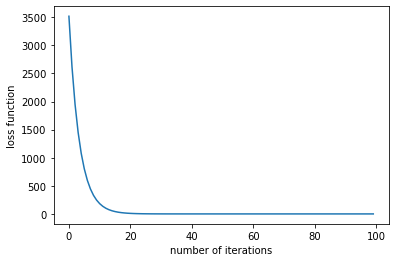

In [9]:
iterr=[i for i in range(iterCounter)]
GD.plotout(iterr,losDraw,"number of iterations","loss function",100)

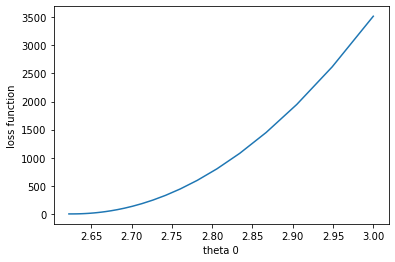

In [10]:
#theta starts random maybe 4 or more
GD.plotout(theta0Draw,losDraw,"theta 0","loss function",50)

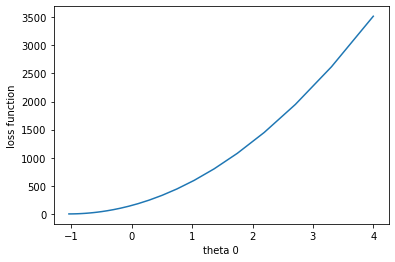

In [11]:
#theta starts random maybe 4 or more
GD.plotout(theta1Draw,losDraw,"theta 0","loss function",50)

#### Plot all regression lines till converge

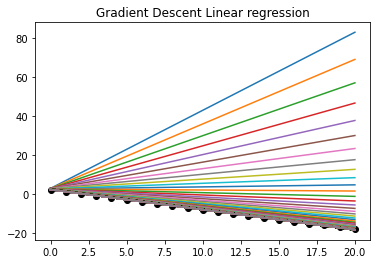

In [12]:
GD.plotRegression(x,y,All_y_predictd)

#### Plot the best regression line

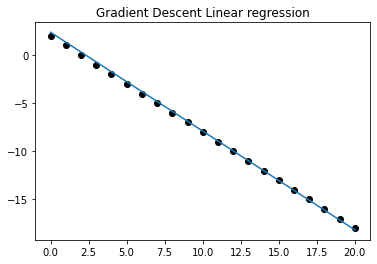

In [13]:
GD.plotRegression(x,y,Final_y_predictd)

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

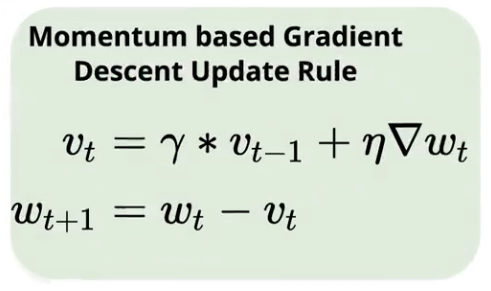

#### γ takes values between 0 and 1.
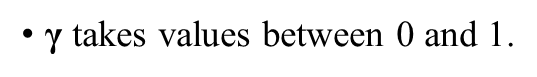

In [14]:
def gradientDescent(x,y_actual,learning_rate,Gama):
    theta0=random.randrange(1,3)
    theta1=random.randrange(1,3)
    v0=0
    v1=0
    x=np.array(x)
    change0,change1=1,1
    thet0=[]
    thet1=[]
    los=[]
    all_y_predictd=[]
    iter_counter=0
    while change0 >=0.000001 or change1>=0.000001:
        y_actual=np.array(y_actual)
        y_predictd=theta0+x.dot(theta1)
        loss = np.square(y_predictd-y_actual)
        cost = np.sum(loss)/(2*len(x))
        los.append(cost)
        gradient_theta0=(learning_rate/len(x))*np.sum((y_predictd-y_actual))
        gradient_theta1=(learning_rate/len(x))*np.sum(np.dot((y_predictd-y_actual),x))
        vt0=Gama*v0+gradient_theta0
        vt1=Gama*v1+gradient_theta1
        temp0=theta0
        temp1=theta1
        thet0.append(temp0)
        thet1.append(temp1)
        theta0=theta0-vt0
        theta1=theta1-vt1
        change0=abs(temp0-theta0)
        change1=abs(temp1-theta1)
        iter_counter+=1
        v0=vt0
        v1=vt1
        all_y_predictd.append(y_predictd)

    return theta0,theta1,cost,y_predictd,los,iter_counter,all_y_predictd,thet0,thet1

In [15]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.01
Gama=0.9
outputs=gradientDescent(x,y,alpha,Gama)


In [16]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
losDraw=outputs[4]
iterCounter=outputs[5]
All_y_predictd=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [17]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9999999999721775


Text(0.5, 1.0, 'Gradient Descent Linear regression')

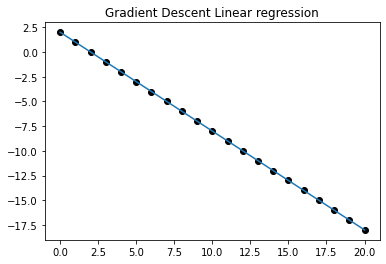

In [18]:
 #plotting the results

plt.scatter(x,y, color='black')
plt.plot(x,Final_y_predictd)
plt.gca().set_title("Gradient Descent Linear regression")

Text(0.5, 1.0, 'Gradient Descent Linear regression')

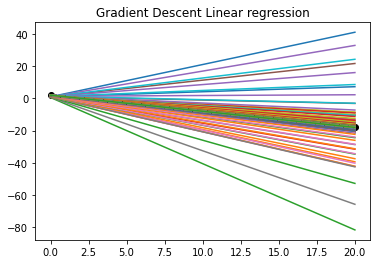

In [19]:
plt.scatter(x,y, color='black')
for i in range(0,len(All_y_predictd)):
    plt.plot(x,All_y_predictd[i])
plt.gca().set_title("Gradient Descent Linear regression")

Text(0, 0.5, 'loss/cost function')

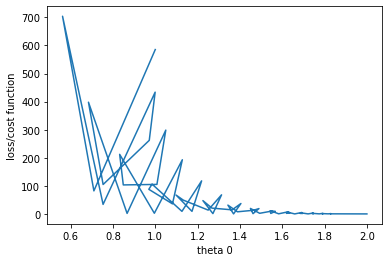

In [20]:
plt.plot(theta0Draw,losDraw)
plt.xlabel("theta 0")
plt.ylabel("loss/cost function")

Text(0, 0.5, 'loss/cost function')

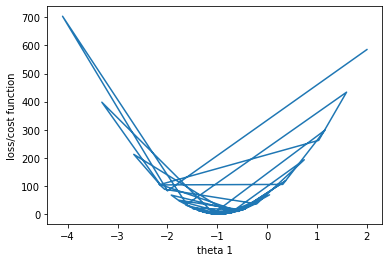

In [21]:
plt.plot(theta1Draw,losDraw)
plt.xlabel("theta 1")
plt.ylabel("loss/cost function")

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

## Small Gama

In [28]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.01
Gama=0.01
outputs=gradientDescent(x,y,alpha,Gama)


In [29]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
losDraw=outputs[4]
iterCounter=outputs[5]
All_y_predictd=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [30]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9999999989976092


Text(0.5, 1.0, 'Gradient Descent Linear regression')

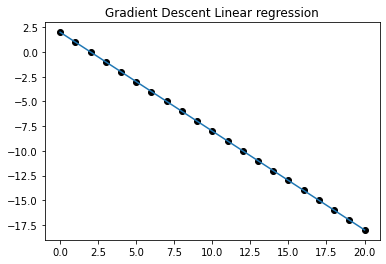

In [31]:
 #plotting the results

plt.scatter(x,y, color='black')
plt.plot(x,Final_y_predictd)
plt.gca().set_title("Gradient Descent Linear regression")

Text(0.5, 1.0, 'Gradient Descent Linear regression')

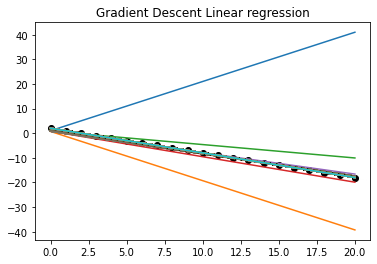

In [32]:
plt.scatter(x,y, color='black')
for i in range(0,len(All_y_predictd)):
    plt.plot(x,All_y_predictd[i])
plt.gca().set_title("Gradient Descent Linear regression")

Text(0, 0.5, 'loss/cost function')

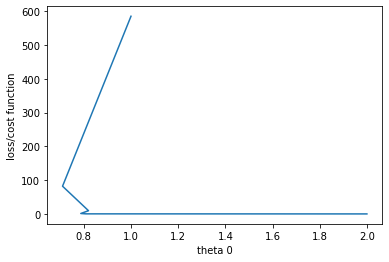

In [33]:
plt.plot(theta0Draw,losDraw)
plt.xlabel("theta 0")
plt.ylabel("loss/cost function")

Text(0, 0.5, 'loss/cost function')

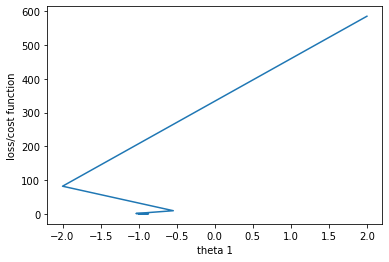

In [34]:
plt.plot(theta1Draw,losDraw)
plt.xlabel("theta 1")
plt.ylabel("loss/cost function")

## Large Gama 0.98

In [35]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.01
Gama=0.98
outputs=gradientDescent(x,y,alpha,Gama)


In [36]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
losDraw=outputs[4]
iterCounter=outputs[5]
All_y_predictd=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [37]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9999999586569345


Text(0.5, 1.0, 'Gradient Descent Linear regression')

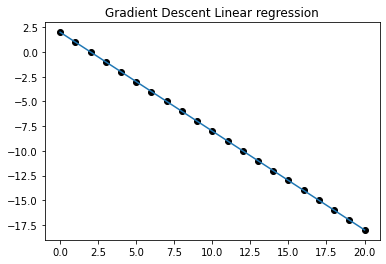

In [38]:
 #plotting the results

plt.scatter(x,y, color='black')
plt.plot(x,Final_y_predictd)
plt.gca().set_title("Gradient Descent Linear regression")

Text(0.5, 1.0, 'Gradient Descent Linear regression')

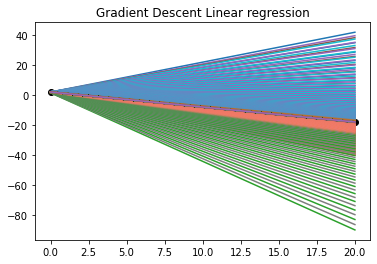

In [39]:
plt.scatter(x,y, color='black')
for i in range(0,len(All_y_predictd)):
    plt.plot(x,All_y_predictd[i])
plt.gca().set_title("Gradient Descent Linear regression")

Text(0, 0.5, 'loss/cost function')

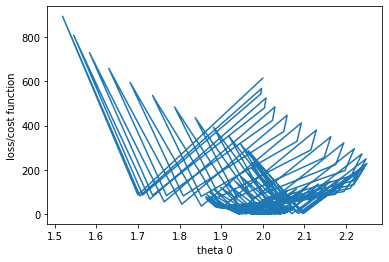

In [40]:
plt.plot(theta0Draw,losDraw)
plt.xlabel("theta 0")
plt.ylabel("loss/cost function")

Text(0, 0.5, 'loss/cost function')

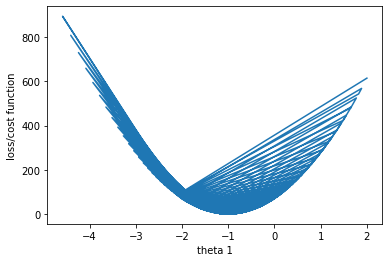

In [41]:
plt.plot(theta1Draw,losDraw)
plt.xlabel("theta 1")
plt.ylabel("loss/cost function")

### Update your Batch GD for one variable  implementation to be NAG and check your results

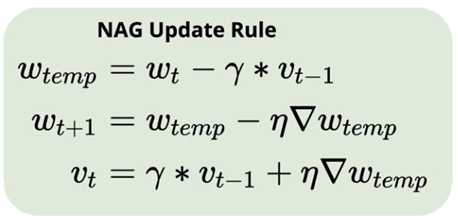

In [42]:
def NAG(x,y_actual,learning_rate,Gama):
    theta0=random.randrange(1,3)
    theta1=random.randrange(1,3)
    x=np.array(x)
    change0,change1=1,1
    thet0=[]
    thet1=[]
    los=[]
    v0=0
    v1=0
    all_y_predictd=[]
    iter_counter=0
    while change0 >=0.000001 or change1>=0.000001:
        y_actual=np.array(y_actual)
        y_predictd=theta0+x.dot(theta1)
        loss = np.square(y_predictd-y_actual)
        cost = np.sum(loss)/(2*len(x))
        los.append(cost)
        theta0temp=theta0-(Gama*v0)
        theta1temp=theta1-(Gama*v1)
        y_predictd_temp=theta0+x.dot(theta1)
        gradient_theta0=(learning_rate/len(x))*np.sum((y_predictd_temp-y_actual))
        gradient_theta1=(learning_rate/len(x))*np.sum(np.dot((y_predictd_temp-y_actual),x))
        theta0=theta0temp-gradient_theta0
        theta1=theta1temp-gradient_theta1
        temp0=theta0
        temp1=theta1
        thet0.append(temp0)
        thet1.append(temp1)
        theta0=theta0-gradient_theta0
        theta1=theta1-gradient_theta1
        change0=abs(temp0-theta0)
        change1=abs(temp1-theta1)
        vt0=(Gama*v0)+gradient_theta0
        vt1=(Gama*v1)+gradient_theta1
        iter_counter+=1
        v0=vt0
        v1=vt1
        
        all_y_predictd.append(y_predictd)

    return theta0,theta1,cost,y_predictd,los,iter_counter,all_y_predictd,thet0,thet1

In [43]:
#Generate DataSet
lenx=20
#inputs
x,y=generateData(lenx)
alpha=0.001
Gama=0.9
outputs=NAG(x,y,alpha,Gama)


In [44]:
#all outputs from my model
final_theta0=outputs[0]
final_theta1=outputs[1]
cost=outputs[2]
Final_y_predictd=outputs[3]
losDraw=outputs[4]
iterCounter=outputs[5]
All_y_predictd=outputs[6]
theta0Draw=outputs[7]
theta1Draw=outputs[8]

In [45]:
GD.caclR2Score(y,Final_y_predictd)

the R2Score is :  0.9999998975955919


Text(0.5, 1.0, 'Gradient Descent Linear regression')

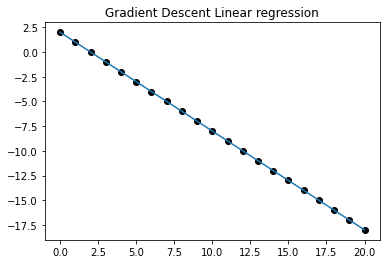

In [46]:
 #plotting the results

plt.scatter(x,y, color='black')
plt.plot(x,Final_y_predictd)
plt.gca().set_title("Gradient Descent Linear regression")

Text(0.5, 1.0, 'Gradient Descent Linear regression')

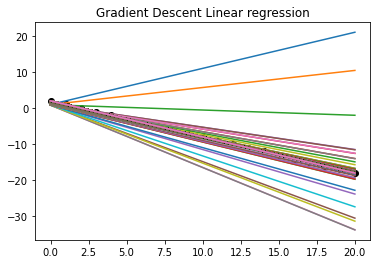

In [47]:
plt.scatter(x,y, color='black')
for i in range(0,len(All_y_predictd)):
    plt.plot(x,All_y_predictd[i])
plt.gca().set_title("Gradient Descent Linear regression")

Text(0, 0.5, 'loss/cost function')

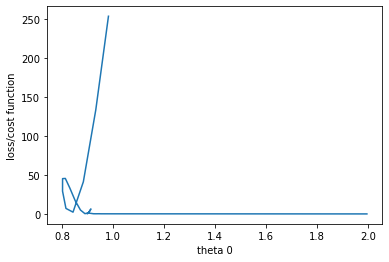

In [48]:
plt.plot(theta0Draw,losDraw)
plt.xlabel("theta 0")
plt.ylabel("loss/cost function")

Text(0, 0.5, 'loss/cost function')

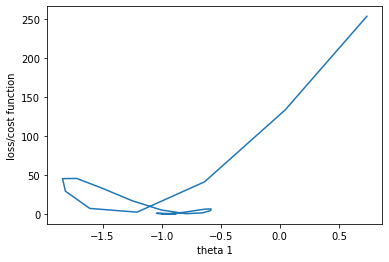

In [49]:
plt.plot(theta1Draw,losDraw)
plt.xlabel("theta 1")
plt.ylabel("loss/cost function")

## Congratulations 
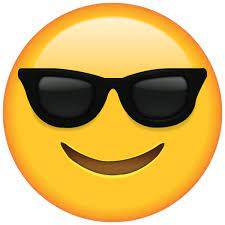